### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
def parser(s):
    return pd.to_datetime(s, format='%d/%m/%Y %H:%M:%S.%f')

In [3]:
#Meteo Data
LC_01 = pd.read_csv("dataverse_files/LC_2022Q1.csv")
LC_02 = pd.read_csv("dataverse_files/LC_2022Q2.csv")
LC_03 = pd.read_csv("dataverse_files/LC_2022Q3.csv")
LC_04 = pd.read_csv("dataverse_files/LC_2022Q4.csv")
Meta = pd.read_csv("dataverse_files/01_Metadata_v2.csv")

In [4]:
LC_065 = pd.concat([LC_01[LC_01["ID"]=="LC-065"], LC_02[LC_02["ID"]=="LC-065"], LC_03[LC_03["ID"]=="LC-065"], LC_04[LC_04["ID"]=="LC-065"]], axis=0).reset_index(drop=True)
LC_087 = pd.concat([LC_01[LC_01["ID"]=="LC-087"], LC_02[LC_02["ID"]=="LC-087"], LC_03[LC_03["ID"]=="LC-087"], LC_04[LC_04["ID"]=="LC-087"]], axis=0).reset_index(drop=True)
LC_102 = pd.concat([LC_01[LC_01["ID"]=="LC-102"], LC_02[LC_02["ID"]=="LC-102"], LC_03[LC_03["ID"]=="LC-102"], LC_04[LC_04["ID"]=="LC-102"]], axis=0).reset_index(drop=True)
LC_109 = pd.concat([LC_01[LC_01["ID"]=="LC-109"], LC_02[LC_02["ID"]=="LC-109"], LC_03[LC_03["ID"]=="LC-109"], LC_04[LC_04["ID"]=="LC-109"]], axis=0).reset_index(drop=True)
LC_112 = pd.concat([LC_01[LC_01["ID"]=="LC-112"], LC_02[LC_02["ID"]=="LC-112"], LC_03[LC_03["ID"]=="LC-112"], LC_04[LC_04["ID"]=="LC-112"]], axis=0).reset_index(drop=True)
LC_117 = pd.concat([LC_01[LC_01["ID"]=="LC-117"], LC_02[LC_02["ID"]=="LC-117"], LC_03[LC_03["ID"]=="LC-117"], LC_04[LC_04["ID"]=="LC-117"]], axis=0).reset_index(drop=True)
LC_118 = pd.concat([LC_01[LC_01["ID"]=="LC-118"], LC_02[LC_02["ID"]=="LC-118"], LC_03[LC_03["ID"]=="LC-118"], LC_04[LC_04["ID"]=="LC-118"]], axis=0).reset_index(drop=True)


### averaging data of 7 weather stations

In [106]:


dfs = [LC_065, LC_087, LC_102, LC_109, LC_112, LC_117, LC_118]

merged_df = dfs[0]
suffixes = ['', '_2', '_3', '_4', '_5', '_6', '_7']

# index start from 1
for i, df in enumerate(dfs[1:], start=1):
    merged_df = pd.merge(merged_df, df, on='DATEUTC', how='inner', suffixes=('', suffixes[i]))

# list of columns to average
columns_to_average = ["LC_HUMIDITY", "LC_DWPTEMP", "LC_n", "LC_RAD", "LC_RAININ", "LC_DAILYRAIN", "LC_WINDDIR", "LC_WINDSPEED", "LC_RAD60", "LC_TEMP_QCL0", "LC_TEMP_QCL1", "LC_TEMP_QCL2", "LC_TEMP_QCL3"]

# list of columns to average
average_columns = {col: merged_df[[f"{col}{suffix}" for suffix in suffixes]].mean(axis=1) for col in columns_to_average}
# dataframe of averages
average_df = pd.DataFrame(average_columns)


average_df['DATEUTC'] = merged_df['DATEUTC']
average_df["ID"] = "AVE"
average_df['Date'] = pd.to_datetime(average_df['DATEUTC']).dt.strftime('%Y/%m/%d')
average_df['Year'] = pd.to_datetime(average_df['DATEUTC']).dt.year
average_df['Month'] = pd.to_datetime(average_df['DATEUTC']).dt.month
average_df['Day'] = pd.to_datetime(average_df['DATEUTC']).dt.day
average_df['Hour'] = pd.to_datetime(average_df['DATEUTC']).dt.hour
average_df['Minute'] = pd.to_datetime(average_df['DATEUTC']).dt.minute

reorder_columns = ["DATEUTC", "ID", "LC_HUMIDITY", "LC_DWPTEMP", "LC_n", "LC_RAD", "LC_RAININ", "LC_DAILYRAIN", "LC_WINDDIR", "LC_WINDSPEED", "Date", "Year", "Month", "Day", "Hour", "Minute", "LC_RAD60", "LC_TEMP_QCL0", "LC_TEMP_QCL1", "LC_TEMP_QCL2", "LC_TEMP_QCL3"]
average_df = average_df[reorder_columns]


average_df





,DATEUTC,ID,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,...,Year,Month,Day,Hour,Minute,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
0,2022-01-01 00:10:00,AVE,89.714286,11.547143,38.000000,0.0,0.0,0.0,43.857143,0.092857,...,2022,1,1,0,10,0.0,13.198571,13.198571,13.104643,13.094123
1,2022-01-01 00:20:00,AVE,89.285714,11.450000,37.000000,0.0,0.0,0.0,57.428571,0.090000,...,2022,1,1,0,20,0.0,13.190000,13.190000,13.096071,13.052405
2,2022-01-01 00:30:00,AVE,89.142857,11.454286,37.857143,0.0,0.0,0.0,20.571429,0.151429,...,2022,1,1,0,30,0.0,13.202857,13.202857,13.108929,13.087100
3,2022-01-01 00:40:00,AVE,89.142857,11.467143,37.142857,0.0,0.0,0.0,10.142857,0.051429,...,2022,1,1,0,40,0.0,13.222857,13.222857,13.128929,13.075781
4,2022-01-01 00:50:00,AVE,89.000000,11.457143,32.857143,0.0,0.0,0.0,-11.571429,0.028571,...,2022,1,1,0,50,0.0,13.231429,13.231429,13.137500,13.073132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,2022-12-31 23:20:00,AVE,52.285714,6.767143,37.000000,0.0,0.0,0.0,23.428571,1.205714,...,2022,12,31,23,20,0.0,16.605714,16.605714,16.511786,16.480869
52556,2022-12-31 23:30:00,AVE,52.285714,6.718571,38.000000,0.0,0.0,0.0,31.857143,1.192857,...,2022,12,31,23,30,0.0,16.551429,16.551429,16.457500,16.437574
52557,2022-12-31 23:40:00,AVE,52.142857,6.650000,37.000000,0.0,0.0,0.0,33.857143,1.405714,...,2022,12,31,23,40,0.0,16.482857,16.482857,16.388929,16.366404
52558,2022-12-31 23:50:00,AVE,52.428571,6.627143,38.000000,0.0,0.0,0.0,65.857143,1.480000,...,2022,12,31,23,50,0.0,16.380000,16.380000,16.286071,16.266041


In [107]:

average_df.to_csv('LC_2022_Ave.csv')

### weather data analysit

LC_RAININ

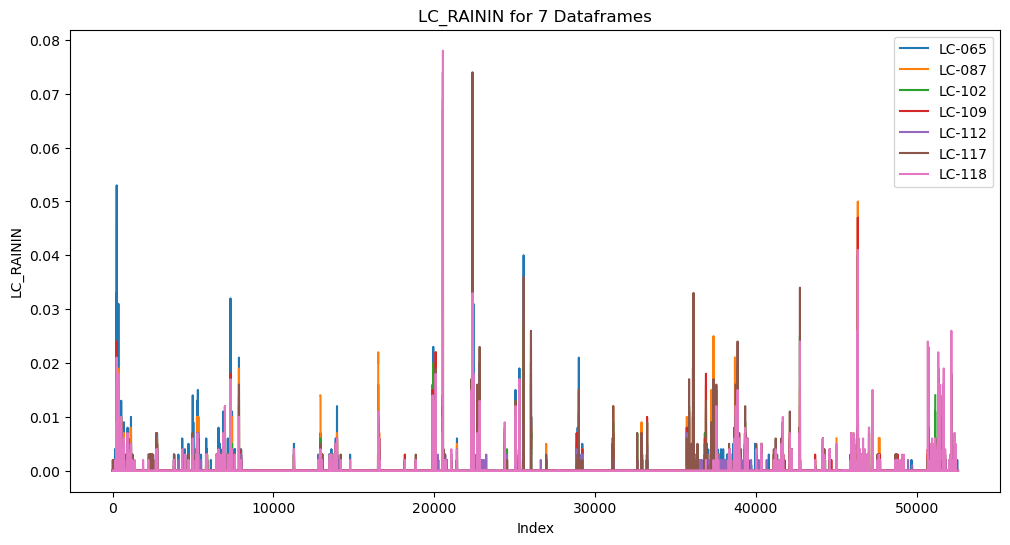

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(LC_065["LC_RAININ"], label="LC-065")
plt.plot(LC_087["LC_RAININ"], label="LC-087")
plt.plot(LC_102["LC_RAININ"], label="LC-102")
plt.plot(LC_109["LC_RAININ"], label="LC-109")
plt.plot(LC_112["LC_RAININ"], label="LC-112")
plt.plot(LC_117["LC_RAININ"], label="LC-117")
plt.plot(LC_118["LC_RAININ"], label="LC-118")

plt.xlabel("Index")
plt.ylabel("LC_RAININ")
plt.legend()
plt.title("LC_RAININ for 7 Dataframes")
plt.show()


In [97]:
df_combined = pd.concat([LC_065["LC_RAININ"], LC_087["LC_RAININ"], LC_102["LC_RAININ"], LC_109["LC_RAININ"], LC_112["LC_RAININ"], LC_117["LC_RAININ"], LC_118["LC_RAININ"]], axis=1)
df_combined.columns = ["LC_RAININ1", "LC_RAININ2", "LC_RAININ3", "LC_RAININ4", "LC_RAININ5", "LC_RAININ6", "LC_RAININ7"]
df_combined = df_combined.dropna()

In [99]:
from itertools import combinations
from scipy.stats import ttest_rel
for combo in combinations(range(1, 8), 2):
    t_stat, p_value = ttest_rel(df_combined[f"LC_RAININ{combo[0]}"], df_combined[f"LC_RAININ{combo[1]}"])
    print(f"LC_RAININ{combo[0]} vs LC_RAININ{combo[1]}: t-statistic = {t_stat}, p-value = {p_value}")


LC_RAININ1 vs LC_RAININ2: t-statistic = -3.191584963944596, p-value = 0.0014160556091050425
LC_RAININ1 vs LC_RAININ3: t-statistic = -2.5030204906001536, p-value = 0.012317859446441249
LC_RAININ1 vs LC_RAININ4: t-statistic = 0.024564284211677896, p-value = 0.9804026322650103
LC_RAININ1 vs LC_RAININ5: t-statistic = 10.828581969125244, p-value = 2.7538210392896826e-27
LC_RAININ1 vs LC_RAININ6: t-statistic = -3.684357861787008, p-value = 0.00022958697800233916
LC_RAININ1 vs LC_RAININ7: t-statistic = -2.0610768558690946, p-value = 0.03930226043613079
LC_RAININ2 vs LC_RAININ3: t-statistic = 1.5070699311681104, p-value = 0.13180075685192313
LC_RAININ2 vs LC_RAININ4: t-statistic = 4.733453574416392, p-value = 2.21497955019955e-06
LC_RAININ2 vs LC_RAININ5: t-statistic = 11.881338009483946, p-value = 1.6819119521778287e-32
LC_RAININ2 vs LC_RAININ6: t-statistic = -1.3258429528672708, p-value = 0.18489941478423494
LC_RAININ2 vs LC_RAININ7: t-statistic = 1.762421215490027, p-value = 0.0780059153056

LC_TEMP_QCL3

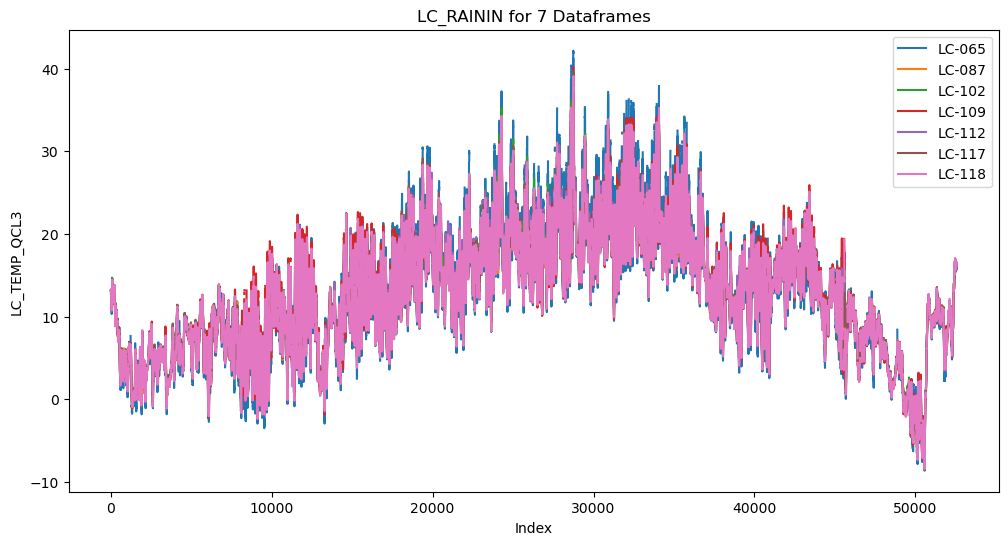

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(LC_065["LC_TEMP_QCL3"], label="LC-065")
plt.plot(LC_087["LC_TEMP_QCL3"], label="LC-087")
plt.plot(LC_102["LC_TEMP_QCL3"], label="LC-102")
plt.plot(LC_109["LC_TEMP_QCL3"], label="LC-109")
plt.plot(LC_112["LC_TEMP_QCL3"], label="LC-112")
plt.plot(LC_117["LC_TEMP_QCL3"], label="LC-117")
plt.plot(LC_118["LC_TEMP_QCL3"], label="LC-118")

plt.xlabel("Index")
plt.ylabel("LC_TEMP_QCL3")
plt.legend()
plt.title("LC_RAININ for 7 Dataframes")
plt.show()


In [102]:
df_combined = pd.concat([LC_065["LC_TEMP_QCL3"], LC_087["LC_TEMP_QCL3"], LC_102["LC_TEMP_QCL3"], LC_109["LC_TEMP_QCL3"], LC_112["LC_TEMP_QCL3"], LC_117["LC_TEMP_QCL3"], LC_118["LC_TEMP_QCL3"]], axis=1)
df_combined.columns = ["LC_TEMP_QCL31", "LC_TEMP_QCL32", "LC_TEMP_QCL33", "LC_TEMP_QCL34", "LC_TEMP_QCL35", "LC_TEMP_QCL36", "LC_TEMP_QCL37"]
df_combined = df_combined.dropna()

In [104]:
from itertools import combinations
from scipy.stats import ttest_rel

for combo in combinations(range(1, 8), 2):
    t_stat, p_value = ttest_rel(df_combined[f"LC_TEMP_QCL3{combo[0]}"], df_combined[f"LC_TEMP_QCL3{combo[1]}"])
    print(f"LC_TEMP_QCL3{combo[0]} vs LC_TEMP_QCL3{combo[1]}: t-statistic = {t_stat}, p-value = {p_value}")

LC_TEMP_QCL31 vs LC_TEMP_QCL32: t-statistic = -42.93841008192722, p-value = 0.0
LC_TEMP_QCL31 vs LC_TEMP_QCL33: t-statistic = -75.15904915915905, p-value = 0.0
LC_TEMP_QCL31 vs LC_TEMP_QCL34: t-statistic = -40.80396961036508, p-value = 0.0
LC_TEMP_QCL31 vs LC_TEMP_QCL35: t-statistic = -72.0548307925105, p-value = 0.0
LC_TEMP_QCL31 vs LC_TEMP_QCL36: t-statistic = -58.03701570028952, p-value = 0.0
LC_TEMP_QCL31 vs LC_TEMP_QCL37: t-statistic = -36.34502275842001, p-value = 2.2635063337451088e-284
LC_TEMP_QCL32 vs LC_TEMP_QCL33: t-statistic = -102.97242462106652, p-value = 0.0
LC_TEMP_QCL32 vs LC_TEMP_QCL34: t-statistic = 22.14740484988969, p-value = 5.300810740202932e-108
LC_TEMP_QCL32 vs LC_TEMP_QCL35: t-statistic = -53.9121747781937, p-value = 0.0
LC_TEMP_QCL32 vs LC_TEMP_QCL36: t-statistic = -38.14185250420007, p-value = 0.0
LC_TEMP_QCL32 vs LC_TEMP_QCL37: t-statistic = 31.885053586547247, p-value = 3.362966601088293e-220
LC_TEMP_QCL33 vs LC_TEMP_QCL34: t-statistic = 78.75368418537597,